# Grover 검색 알고리즘

## 검색 문제

컴퓨터가 해결하는 많은 문제들은 *검색 문제* 유형입니다. 웹 사이트에서 데이터베이스를 구축하고 검색할 수 있는 프로그램인 검색 엔진을 사용하여 이미 웹 검색을 경험해 보았을 것입니다. 우리는 데이터베이스를 주소값을 입력으로 받아 그 주소값에 해당하는 데이터를 출력하는 프로그램이라고 생각할 수 있습니다. 전화번호부가 좋은 예입니다. 전화번호부 각 항목에는 이름과 번호가 있습니다. 예를 들어 데이터베이스에 3441번가의 데이터를 제공하도록 요청하면 책에 있는 3441번가에 해당하는 이름과 번호가 반환됩니다.

![Information flow in a black box database.](images/grover/database-phonebook.svg)

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

이렇게 데이터베이스에 입력을 제공하고 출력을 읽는 과정을 "데이터베이스에 문의하기"라고 합니다. 종종 컴퓨터 과학에서, 데이터베이스를 블랙박스로 간주하는데 이는, 데이터베이스가 어떻게 작동하는지 사용자는 볼 수 없다는 것을 의미합니다. 미리 정해진 규칙대로 행해지는 마법 같은 과정이 있다고 가정해봅시다. 이러한 마법의 과정을 "오라클"이라고 부르겠습니다.

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

만약 찾으려고 하는 사람의 이름이 있고 그 사람의 전화번호를 찾으려고 할 때 책의 이름이 알파벳순으로 정렬되어 있으면 쉽게 찾을 수 있습니다. 이를 위해 *이진 검색* 이라는 알고리즘을 사용할 수 있습니다.

<!-- ::: q-block -->

### 예: 이진 검색

<!-- ::: q-carousel -->

<!-- ::: div -->

![Example of a database](https://github.com/Qiskit/platypus/blob/main/translations/ko/intro/images/grover/carousel/0/0.svg?raw=true)

이진 검색은 정렬된 데이터베이스 검색에서 매우 효율적인 고전 알고리즘입니다. 책의 특정 페이지를 검색할 때(또는 실제 전화번호부를 사용하여) 비슷한 것을 사용했을 것입니다. Evelina의 전화번호를 찾고 싶다고 가정해 봅시다.

<!-- ::: -->

<!-- ::: div -->

![Example of the first step of a binary search algorithm, the computer has selected the middle entry](images/grover/carousel/0/1.svg)

먼저, 데이터베이스에서 중간값을 찾고 이것이 우리가 찾으려고 하는 값보다 위에 있는지 아래에 있는지 확인합니다.

<!-- ::: -->

<!-- ::: div -->

![Second step of a binary search algorithm](images/grover/carousel/0/2.svg)

이 경우 "H"는 "E" 다음에 옵니다. 목록이 정렬되었으므로 우리가 찾는 값의 주소가 7보다 낮아야 한다는 것을 알고 있습니다. 6보다 큰 주소는 무시하고 축소된 목록에서 이 알고리즘을 반복할 수 있습니다.

<!-- ::: -->

<!-- ::: div -->

![Third step of a binary search algorithm](images/grover/carousel/0/3.svg)

이번에는, 중간값의 이름은 “D”로 시작합니다. 이는 "E" 앞에 있습니다. 이제 우리가 찾는 값이 3보다 큰 주소를 가진다는 것을 알게 되었습니다.

<!-- ::: -->

<!-- ::: div -->

![Fourth step of a binary search algorithm](images/grover/carousel/0/4.svg)

각 단계에서 작업 중인 목록의 크기가 절반으로 줄어들기 때문에 검색 공간은 지수적으로 *감소*됩니다.

<!-- ::: -->

<!-- ::: div -->

![Fifth step of a binary search algorithm](images/grover/carousel/0/5.svg)

이는 매우 큰 데이터베이스에서도 항목을 빠르게 찾을 수 있다는 것을 의미합니다.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block.exercise -->

### 막간 퀴즈

<!-- ::: q-quiz(goal="intro-grover-0") -->

필요한 최대 데이터베이스 쿼리 수는 데이터베이스의 항목 수에 따라 로그(밑이 2)로 증가합니다.

<!-- ::: .question -->

이진 검색을 사용했을 때 어떤 것이 1024개의 항목이 있는 정렬된 데이터베이스를 검색하는 데 필요한 쿼리 수가 가장 많습니까?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 10

<!-- ::: -->

<!-- ::: .option -->

1. 1

<!-- ::: -->

<!-- ::: .option -->

1. 100

<!-- ::: -->

<!-- ::: -->

*힌트: 한 항목만 남기려면 데이터베이스를 몇번 절반으로 줄여야 합니까?*

<!-- ::: -->

이진 검색은 데이터베이스의 크기에 따라 [대수적](gloss:logarithm) 으로 증가하기 때문에 양자 컴퓨터에서 개선의 여지가 많지 않습니다. 그러나 정렬된 목록을 검색하는 것이 항상 편리한 것은 아닙니다. 대신 전화번호가 주어지고 그 번호와 관련된 이름을 찾고 싶다면 어떻게 해야 할까요?

전화번호부는 일반적으로 번호 별로 정렬되지 않기 때문에 이것은 훨씬 더 어렵습니다. 전화번호가 목록에서 무작위로 정렬되어 있다고 가정하면 지난번에 했던 것처럼 목표물에 접근할 방법이 없습니다. 고전적인 컴퓨터로 할 수 있는 최선은 무작위로 입력 주소를 선택하고 여기에 우리가 찾고 있는 전화번호가 포함되어 있는지 확인한 다음 올바른 입력을 찾을 때까지 반복하는 것입니다. 이러한 이유로 검색 시간을 개선하기 위해 데이터베이스를 [목록화](gloss:index) 하는 데 많은 노력이 필요합니다.

데이터베이스가 이와 같이 완전히 무질서할 때 우리는 그것을 *비정형* 이라고 합니다. 그리고 이 페이지에서 배울 양자 알고리즘은 구조화되지 않은 검색을 위한 알고리즘입니다.

<!-- ::: q-block.exercise -->

### 구조화되지 않은 검색

<!-- ::: q-quiz(goal="intro-grover-1") -->

<!-- ::: .question -->

무작위로 입력을 선택하여 비정형화된 데이터베이스를 검색하는 경우 찾고 있는 항목을 찾기 전에 평균적으로 몇 개의 입력을 확인해야 할까요?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 가능한 입력의 절반.

<!-- ::: -->

<!-- ::: .option -->

1. 가능한 모든 입력.

<!-- ::: -->

<!-- ::: .option -->

1. 가능한 입력의 4분의 3.

<!-- ::: -->

<!-- ::: -->

***

<!-- ::: q-quiz(goal="intro-grover-2") -->

<!-- ::: .question -->

무작위 추측을 사용하여 데이터베이스의 항목 수에 따라 필요한 평균 데이터베이스 쿼리 수가 어떻게 증가합니까?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 선형적으로.

<!-- ::: -->

<!-- ::: .option -->

1. 대수적으로.

<!-- ::: -->

<!-- ::: .option -->

1. 2차적으로.

<!-- ::: -->

<!-- ::: .option -->

1. 기하급수적으로.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

여기에서 무작위 추측보다 더 잘할 수 없는 것처럼 보일 수도 있습니다. 데이터베이스에서 올바른 항목이 어디에 있는지 알 수 없으며 각각의 잘못된 쿼리는 하나의 항목만 제외합니다.

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

고전적인 컴퓨터의 경우 우리의 직관은 정확하지만, 데이터베이스가 양자 중첩을 입력 및 출력할 수 있다면 무작위 추측보다 더 잘 할 수 있다는 것이 밝혀졌습니다! 이 페이지에서는 첫 번째 양자 알고리즘인 Grover의 양자 검색 알고리즘에 대해 배웁니다. 모든 데이터베이스(정형 또는 비정형)를 검색할 때 Grover의 알고리즘은 입력 수의 *제곱근* 으로 증가하며, 비정형 검색의 경우 최고의 고전 알고리즘보다 [2차](gloss:quadratic) 개선된 것입니다.

![Comparison of best algorithm run times for quantum and classical unstructured search](https://gitlocalize.com/repo/7494/ko/notebooks/intro/images/grover/rg-vs-grover.svg)

## 블랙박스를 넘어

검색 알고리즘은 전화번호부와 같이 수집된 정보의 데이터베이스를 검색할 수 있지만 그 이상도 수행할 수 있습니다. 문제를 데이터베이스 검색 문제처럼 *보이게* 만들 수 있다면 검색 알고리즘을 사용하여 해결할 수 있습니다. 예를 들어, [스도쿠](gloss:sudoku) 를 푸는 문제를 생각해 봅시다. 누군가가 스도쿠를 풀었다고 주장하는 경우 꽤 빨리 해결되었는지 확인할 수 있습니다. 각 행을 확인하고, 각 열을 확인하고, 각 사각형을 확인하면 완료됩니다. 이런 의미에서 *사용자* 는 데이터베이스이며 솔루션을 제공한 사람이 당신에게 질문하고 있습니다. 그들은 "예, 이것은 유효한 솔루션입니다"라는 정보를 반환하는 입력을 찾으려고 합니다.

실제로, 우리는 "특정 출력을 초래하는 입력 찾기"로서 많은 계산 문제를 제시할 수 있습니다.

![We can view a program that assesses proposed solutions as a database.](https://github.com/Qiskit/platypus/blob/main/translations/ko/intro/images/grover/database-computation.svg?raw=true)

<!-- vale QiskitTextbook.Acronyms = NO -->

이와 같이 해결할 수 있는 문제의 한 예는 불리언 만족도 문제('SAT'로 알려짐)입니다.

## SAT 문제

SAT 문제들은 컴퓨터 과학 분야에서 광범위하게 연구되고 있으며 다른 많은 컴퓨팅 문제들을 SAT 문제로 변환할 수 있습니다. 이 페이지에서는 Grover 알고리즘을 사용하여 간단한 SAT 문제를 해결하고 여기에서 배운 기술을 사용하여 다른 문제에 양자 검색 알고리즘을 적용할 수 있습니다.

SAT 문제에 대한 해답은 비트열로 양자 회로에 쉽게 매핑할 수 있습니다. 문제 자체는 본질적으로 다양한 비트 값 조합을 배제하게 해주는 여러 조건 들이고 우리는 이걸 절이라고 부릅니다. 예를 들어, 3비트가 있는 경우 절 중 하나는 "0번째 비트를 `ON` *으로 하면서* 첫 번째 비트를 `OFF` 로 할 수 없습니다"가 될 수 있으며, 이는 `101` 및 `001` 조합을 유효한 솔루션으로 배제합니다.

모든 절이 정확히 3비트를 참조하고 각 절에서 이러한 비트 조건 중 하나가 충족되어야 하는 *"[3-SAT](gloss:3-sat) "* 문제를 인코딩하는 SAT 문제가 이 파일에 있습니다. 

<!-- ::: q-block -->

### 예제 3-SAT 문제

다음은 "DIMACS CNF"라는 파일 형식으로 저장된 3-SAT 문제의 예입니다. 이 파일은 매우 간단하며 SAT 문제를 저장하는 한 가지 방법일 뿐입니다.

$\cssId{_dimacs-c}{\texttt{c example DIMACS-CNF 3-SAT}}$<br> $\cssId{_dimacs-problem}{\texttt{p cnf 3 5}}$<br> $\texttt{-1 -2 -3 0}$<br> $\cssId{_dimacs-clause-1}{\texttt{1 -2 3 0}}$<br> $\texttt{1 2 -3 0}$<br> $\cssId{_dimacs-clause-3}{\texttt{1 -2 -3 0}}$<br> $\cssId{_dimacs-clause-4}{\texttt{-1 2 3 0}}$<br>

<!-- ::: -->

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

스도쿠와 마찬가지로 비트 문자열이 SAT 문제에 대한 유효한 해답인지 확인하는 것은 쉽습니다. 각 절을 차례로 살펴보고 문자열이 그 중 하나라도 따르지 않는지 확인합니다. 우리는 이 과정을 양자 회로에서 어떻게 하는지에 대해 걱정하지 않을 것입니다. 우리는 SAT 해답을 확인하기 위한 효율적인 고전 알고리즘을 가지고 있다는 것을 기억하시길 바랍니다. 지금은 Qiskit의 내장 도구를 사용하여 이를 수행하는 회로를 구축할 것입니다.

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

우리는 이 파일을 실행 중인 코드와 관련하여 `examples/3sat.dimacs` 에 저장했습니다.

In [1]:
with open('examples/3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)  # let's check the file is as promised

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

우리는 Qiskit의 회로 라이브러리를 사용하여 위에서 설명한 오라클의 역할을 수행하는 회로를 구축할 수 있습니다 (이제는 이 회로가 마술적고 강력하지 않지만 계속 '오라클'이라고 부를 것입니다).

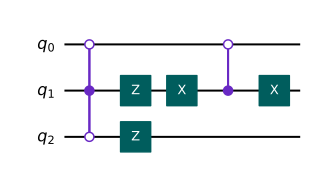

In [2]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/3sat.dimacs')
oracle.draw()

위의 이 회로는 앞에서 설명한 데이터베이스와 유사하게 작동합니다. 이 회로에 대한 입력은 3비트 문자열이며 주어진 출력은 입력 문자열이 SAT 문제의 해답인지 여부에 따라 다릅니다.

이런 검사하는 계산의 결과는 여전히 `True` 또는 `False` 이지만 이 회로의 행동은 여러분이 예상한 것과 약간 다를 것입니다. 이 회로를 Grover 알고리즘과 함께 사용하기 위해 우리는 오라클이 상태가 해답이면 출력 상태의 위상을 180도 변경하기를 원합니다 (즉, 곱하기 -1). 이것이 Qiskit이 ` `PhaseOracle``라는 클래스를 부르는 이유입니다.

$$ U_\text{oracle}|x\rangle = \bigg{ \begin{aligned} \phantom{-}|x\rangle &amp; \quad \text{if $x$ is not a solution} \ -|x\rangle &amp; \quad \text{if $x$ is a solution} \ \end{aligned} $$

예를 들어, 이 문제에 대한 유일한 해답은 `000` , `011` 및 `101` 이므로 위의 회로에는 다음과 같은 행렬이 있습니다.

$$ U_\text{oracle} = \begin{bmatrix} -1 &amp; 0 &amp; 0 &amp;  0 &amp; 0 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 1 &amp; 0 &amp;  0 &amp; 0 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 1 &amp;  0 &amp; 0 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp; -1 &amp; 0 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp;  0 &amp; 1 &amp;  0 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp;  0 &amp; 0 &amp; -1 &amp; 0 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp;  0 &amp; 0 &amp;  0 &amp; 1 &amp; 0  \ 0 &amp; 0 &amp; 0 &amp;  0 &amp; 0 &amp;  0 &amp; 0 &amp; 1  \ \end{bmatrix} $$

요약:

1. 제안된 해답이 올바른지 쉽게 확인할 수 있는 문제가 있습니다.
2. 해답을 확인하는 알고리즘을 해답 상태의 위상을 변경하는 양자 회로로 변환할 수 있습니다.
3. 그런 다음 Grover 알고리즘을 사용하여 어떤 상태들의 위상이 변경되었는지를 알아낼 수 있습니다.

그런 의미에서 데이터베이스나 오라클이 *해결* 되어야 할 문제입니다.

![Image showing input to Grover's algorithm as an oracle and output is a solution to that oracle](images/grover/grover-input-output.svg)

## Grover 알고리즘 개요

이제 문제에 대해서 이해했으니 마침내 Grover 알고리즘에 대해서 공부할 차례입니다. Grover 알고리즘에는 세 단계가 있습니다.

1. 첫 번째 단계는 오라클의 가능한 모든 입력에 동일한 중첩 상태을 만들어주는 것입니다. 큐비트가 모두 $|0\rangle$ 상태에서 시작하는 경우 각 큐비트에 H 게이트를 적용하여 이 중첩 상태를 생성할 수 있습니다. 우리는 이 중첩 상태를 '$|s\rangle$'이라고 부를 것입니다.

2. 다음 단계는 이러한 큐비트들을 오라클 회로($U_\text{oracle}$)에 실행하는 것입니다. 이 페이지에서는 Qiskit이 우리를 위해서 만들어준 `oracle`라는 회로를 사용하지만 우리는 이 뿐만 아니라 해답 상태의 단계를 변경하는 모든 회로나 하드웨어를 사용할 수 있습니다.

3. 마지막 단계는 큐비트에서 '확산 연산자' 또는 '확산기'($U_s$)라는 회로를 실행하는 것입니다. 다음 섹션에서 Grover 알고리즘에 대해서 배울 때 이 회로에 대해서 다시 한번 보겠지만, 이 회로는 모든 오라클에서 동일하게 작동하는 매우 간단한 회로입니다.

그런 다음 회로의 크기에 따라 2단계와 3단계를 여러번 반복해야 합니다. 2단계에서 오라클을 쿼리하므로 쿼리 수는 가능한 입력 갯수의 제곱근에 대략 비례합니다. 2단계와 3단계를 적절한 횟수만큼 반복하면 측정할 때 오라클의 해답을 측정할 확률이 높아집니다.

![Compact circuit diagram of Grover's algorithm](images/grover/grover-circuit-high-level.png)

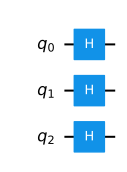

In [3]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw()

다음으로 Qiskit의 도구를 다시 사용하여 2단계와 3단계를 수행하는 회로를 만들 수 있습니다. 

In [4]:
# steps 2 & 3 of Grover's algorithm
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)

그리고 이것을 Grover 알고리즘을 수행하는 회로로 결합할 수 있습니다. 이 문제는 한 번만 하면 충분할 정도로 작기에 여기에서는 2단계와 3단계를 반복하지 않습니다.

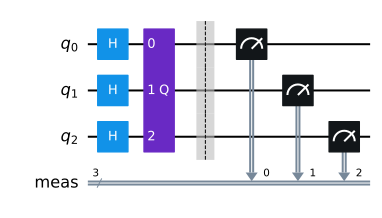

In [5]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

마지막으로 시뮬레이터에서 이것을 실행하고 어떤 결과를 얻는지 봅시다.

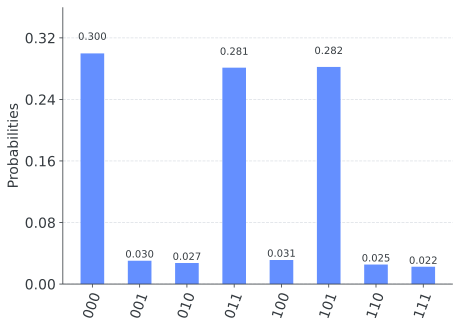

In [6]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

우리는 SAT 문제에 대한 3가지 해답 중 하나를 측정할 확률이 높습니다.

<!-- ::: q-block.exercise -->

### 막간 퀴즈

<!-- ::: q-quiz(goal="intro-grover-3") -->

<!-- ::: .question -->

이 양자 회로에 의해 해결된 SAT 문제에 대한 해답은 다음 중 어느 것입니까?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. `011`

<!-- ::: -->

<!-- ::: .option -->

1. `001`

<!-- ::: -->

<!-- ::: .option -->

1. `010`

<!-- ::: -->

<!-- ::: .option -->

1. `110`

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Grover 알고리즘은 어떻게 작동합니까?

우리는 검색 문제에 대해 배웠고 Grover 알고리즘이 문제를 해결하는 데 사용되는 것을 보았습니다. 하지만 이 알고리즘이 어떻게 그리고 왜 작동할까요?

<!-- ::: q-block -->

### Grover 알고리즘 시각화

<!-- ::: q-carousel -->

<!-- ::: div -->

Grover 알고리즘에는 적절한 기하학적 설명이 있습니다. 우리는 벡터를 통해 양자 상태를 나타낼 수 있음을 보았습니다. 이와 같은 검색 문제의 경우 우리가 관심을 두는 벡터는 해답과 나머지 두 가지뿐입니다. 모든 해답 상태의 중첩을 `$|?\rangle$`이라고 하므로 위의 SAT 문제에 대해 다음을 수행합니다.

$$|✓\rangle = \tfrac{1}{\sqrt{3}}(|000\rangle + |011\rangle + |101\rangle)$$

다른 모든 상태의 중첩을 '$|✗\rangle$'이라고 부를 것입니다.

$$|✗\rangle = \tfrac{1}{\sqrt{5}}(|001\rangle + |010\rangle + |100\rangle + |110\rangle + |111\rangle)$$

<!-- ::: -->

<!-- ::: div -->

**상태 평면**

![Image showing a |omega> and |s prime> as the y and x axis of a 2D space](images/grover/carousel/1/0.svg)

두 벡터 $|✓\rangle$ 및 $|✗\rangle$은 요소를 공유하지 않으므로 수직이므로 2D 평면에서 직각으로 그릴 수 있습니다. 이것들은 각각 y축과 x축이 됩니다.

<!-- ::: -->

<!-- ::: div -->

**1 단계**

![Image showing a |omega> and |s prime> as the y and x axis of a 2D space](images/grover/carousel/1/1.svg)

이 평면에 알고리즘의 여러 단계에서의 양자 컴퓨터의 상태를 표시해 보겠습니다. 우리가 그릴 첫 번째 상태는 $|s\rangle$입니다. 1단계(초기화 단계) *이후* 의 상태입니다. 이 상태는 모든 계산 기반 상태의 동일한 중첩입니다. 가능한 상태는 솔루션이거나 솔루션이 아니므로 $|s\rangle$을 $|✓\rangle$와 $|✗\rangle$의 일부 조합으로 쓸 수 있으므로 평면에서 이들 사이에 위치합니다.

$$|s\rangle = a|✗\rangle + b|✓\rangle$$

<!-- ::: -->

<!-- ::: div -->

**1 단계**

![Image showing |s> on the |omega> / |s-prime> plane](images/grover/carousel/1/1.svg)

어려운 문제의 경우 많은 입력이 있을 것으로 예상되지만 해답의 수는 적습니다. 이 경우 $|s\rangle$은 $|✓\rangle$보다 $|✗\rangle$에 훨씬 더 가까우므로(즉, 둘 사이의 각도, $\theta$가 작음) 측정이 $|✓\rangle$을 구성하는 계산 기반 상태 중 하나를 지정하는 것은 일어나지 않을것 같습니다. 우리의 목표는 가능한 한 $|✓\rangle$에 가까운 상태로 컴퓨터를 만드는 것입니다.

<!-- ::: -->

<!-- ::: div -->

**2 단계**

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/1/2.svg)

다음으로 $U_\text{oracle}$ 회로를 통해 큐비트를 전달합니다. 위에서의 정의에 따르면 $U_\text{oracle}$는 모든 해답 상태의 위상을 뒤집습니다. 다이어그램에서 이것은 $|✗\rangle$ 벡터를 통한 반사입니다. 즉:

$$a|✗\rangle + b|✓\rangle \xrightarrow{\text{oracle}} a|✗\rangle - b|✓\rangle$$

<!-- ::: -->

<!-- ::: div -->

**3단계**

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/1/2.svg)

우리는 $|✗\rangle$ 벡터를 통해 반사할 수 있다는 것을 보았습니다. 우리 상태를 $|✓\rangle$에 더 가깝게 이동시킬 수 있는 또 다른 벡터가 있습니까? 정답은 '예'입니다. 벡터 $|s\rangle$를 통해 반영할 수 있습니다. 처음에는 이를 수행하는 회로를 만드는 방법이 명확하지 않을 수 있지만 이 페이지의 뒷부분에서 다룰 비교적 간단한 작업입니다.

<!-- ::: -->

<!-- ::: div -->

**마무리 (혹은 반복)**

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/1/3.svg)

이제 상태 벡터는 이전보다 $|✓\rangle$에 더 가깝습니다. 이는 해답 상태 중 하나를 측정할 가능성이 더 높다는 것을 의미합니다. 해답이 하나만 있는 경우 해당 해답을 측정할 확률이 가장 높기 위해 2 &amp; 3단계 ~$\sqrt{N}$ 번 반복해야 합니다.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block -->

### 오라클을 쿼리해야 하는 횟수는?

<!-- ::: q-carousel -->

<!-- ::: div -->

![Image showing a |omega> and |s prime> as the y and x axis of a 2D space](images/grover/carousel/2/0.svg)

이를 해결하려면 각 단계 반복이 $|✓\rangle$ 방향으로 상태를 얼마나 회전하는지 작업해야 합니다. 알고리즘의 중간 어딘가에 있다고 가정해 보겠습니다. 컴퓨터의 상태($|\psi\rangle$)는 시작 상태 $|s\rangle$에서 $\phi$의 각도입니다. $|\psi\rangle$과 $|✗\rangle$ 사이의 각도는 $\theta + \phi$입니다.

<!-- ::: -->

<!-- ::: div -->

![Image showing a |omega> and |s prime> as the y and x axis of a 2D space](images/grover/carousel/2/1.svg)

오라클은 $|✗\rangle$ 주위에 컴퓨터의 상태 벡터를 반영하므로 새로 반사된 상태 벡터($|\psi'\rangle$)와 $|✗\rangle$ 사이의 각도도 $\theta가 됩니다. + \PHI$.

<!-- ::: -->

<!-- ::: div -->

![Image showing |s> on the |omega> / |s-prime> plane](images/grover/carousel/2/2.svg)

다음으로 $|s\rangle$를 통해 반영합니다. 컴퓨터 상태($|\psi'\rangle$)와 $|s\rangle$ 사이의 각도는 $2\theta + \phi$입니다.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/2/3.svg)

따라서 한 번의 단계 반복 후에 우리의 컴퓨터 상태와 $|s\rangle$ 사이의 각도가 $2\theta + \phi$임을 알게 됩니다.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/2/4.svg)

이는 각 단계 반복이 컴퓨터 상태를 $|✓\rangle$ 방향으로 $2\theta$만큼 회전한다는 것을 의미합니다.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/2/5.svg)

이제 우리는 $2\theta$가 직각에까지 가는데 몇번 필요한지 알아내면 됩니다. 이것은 대략 $|s\rangle$을 $|✓\rangle$로 회전하는 데 필요한 단계 반복 횟수입니다.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/2/6.svg)

그렇다면 $N$의 관점에서 $\theta$의 각도는 얼마입니까? 약간의 삼각법을 사용하여 $\sin(\theta)$는 $|s\rangle$의 $|✓\rangle$ 구성요소를 $|s\rangle$의 길이로 나눈 값(즉, 1). 해답 상태가 하나만 있는 경우 $|s\rangle = \tfrac{1}{\sqrt{N}}(|0\rangle + |1\rangle \dots + |✓\rangle \dots + |N-1 \rangle)$. 따라서 $\sin(\theta) = \tfrac{1}{\sqrt{N}}$입니다.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/2/7.svg)

마지막으로 어려운 문제의 경우 $\theta$는 매우 작습니다. 즉, 작은 각도 근사법을 사용하여 $\theta \approx \tfrac{1}{\sqrt{N}}$ 라디안이라고 말할 수 있습니다.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |s-prime> plane](images/grover/carousel/2/8.svg)

작은 $\theta$에 대해 $|s\rangle$을 $\pi/2$ 라디안 주위로 회전하고 싶기 때문에 대략 $\tfrac{\pi}{2}\div\tfrac{ 2}{\sqrt{N}} = \tfrac{\pi}{4}\sqrt{N}$ 만큼 단계 반복을 해야합니다. 한번의 단계 반복당 오라클을 한번 쿼리하기 때문에 필요한 오라클 쿼리 수는 정확히 하나의 해답이 있는 경우 $\sqrt{N}$에 비례합니다.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block.exercise -->

### 막간 퀴즈

<!-- ::: q-quiz(goal="intro-grover-4") -->

<!-- ::: .question -->

가능한 입력이 많고 해답이 정확히 하나인 Oracle의 경우 $\theta \approx \tfrac{1}{\sqrt{N}}$입니다. 해답이 *두개 일 경우* $\theta$의 대략적인 값은 얼마입니까?

<!-- ::: -->

<!-- ::: .option -->

1. $\theta \approx \tfrac{2}{\sqrt{N}}$

<!-- ::: -->

<!-- ::: .option(correct) -->

1. $\theta \approx \tfrac{\sqrt{2}}{\sqrt{N}}$

<!-- ::: -->

<!-- ::: .option -->

1. $\theta \approx \tfrac{1}{\sqrt{2N}}$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Grover 알고리즘의 회로

이 장을 마무리하기 위해 Grover 알고리즘을 구현하는 간단한 회로를 처음부터 만들고 작동하는 것을 보여 줍니다. 두 개의 큐비트를 사용하고 오라클 회로를 만드는 것으로 시작하겠습니다.

In [7]:
from qiskit import QuantumCircuit

### 오라클

일을 단순하게 유지하기 위해 여기에서 실제 문제를 해결하지 않을 것입니다. 이 데모에서는 $|11\rangle$ 상태의 위상을 뒤집고 나머지는 변경하지 않는 회로를 만듭니다. 다행히도 우리는 이미 정확히 그 일을 하는 2-큐비트 게이트를 알고 있습니다!

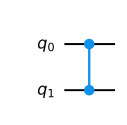

In [8]:
oracle = QuantumCircuit(2)
oracle.cz(0,1)  # invert phase of |11>
oracle.draw()

다음은 이 회로의 행렬 표현을 보여주는 간단한 함수입니다.

In [9]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(oracle, "U_\\text{oracle}=")

<IPython.core.display.Latex object>

<!-- ::: q-block.exercise -->

### 실습

다른 3개의 계산 기반 상태($|00\rangle$, $|01\rangle$ 및 $|10\rangle$)를 대상으로 하는 오라클 회로를 3개 더 만들 수 있습니까? `display_unitary` 를 사용하여 답을 확인하세요.

*힌트:* $|11\rangle$을 대상으로 하는 기본 상태로 또는 그 반대로 변환하는 회로를 생성해 보십시오. 그런 다음 이 회로를 `cz` 게이트와 함께 사용할 수 있습니까?

[IBM Quantum Lab](https://quantum-computing.ibm.com/lab)을 사용해 보십시오.

<!-- ::: -->

### 디퓨저 만들기

다음으로 2개의 큐비트용 디퓨저를 생성합니다. $|s\rangle$ 상태를 중심으로 반사를 수행하기를 원하므로 이 반사를 수행하는 회로를 구축하기 위해 이미 가지고 있는 도구를 사용할 수 있는지 봅시다.

우리는 이미 `cz` 게이트가 $|11\rangle$(위상 단계까지) 주변에서 반사하는 것을 보았으므로 $|s\rangle \rightarrow |11\rangle$을 매핑하는 변환을 알고 있다면 다음을 수행할 수 있습니다. :

1. 다음 변환 수행 $|s\rangle \rightarrow |11\rangle$
2. $|11\rangle$을 사용해 반사(예: `cz` 게이트)
3. 다음 변환 수행 $|11\rangle \rightarrow |s\rangle$

각 큐비트에 H-gate를 적용하여 $|00\rangle$ 상태에서 $|s\rangle$ 상태를 생성할 수 있다는 것을 알고 있습니다. H-gate는 자체 역이기 때문에 각 큐비트에 H-gate를 적용하면 $|s\rangle \rightarrow |00\rangle$도 수행됩니다.

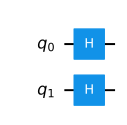

In [10]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.draw()

이제 $|00\rangle \rightarrow |11\rangle$을 변환하는 방법을 알아내야 합니다.

<!-- ::: q-block.exercise -->

### 막간 퀴즈

<!-- ::: q-quiz(goal="intro-grover-5") -->

<!-- ::: .question -->

다음 중 $|0\rangle \rightarrow |1\rangle$을 변환하는 게이트는 무엇입니까?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. `x`

<!-- ::: -->

<!-- ::: .option -->

1. `z`

<!-- ::: -->

<!-- ::: .option -->

1. `h`

<!-- ::: -->

<!-- ::: .option -->

1. `s`

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

따라서 각 큐비트에 X-gate를 적용하면 $|00\rangle \rightarrow |11\rangle$로 변환됩니다. 실행 합시다:

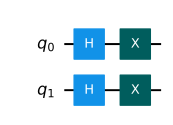

In [11]:
diffuser.x([0,1])
diffuser.draw()

이제 변환 $|s\rangle \rightarrow |11\rangle$이 있으므로 `cz` 게이트를 적용하고 변환을 반대로 할 수 있습니다.

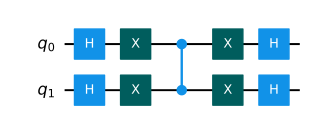

In [12]:
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw()

### 통합하기

이제 우리는 두 개의 회로, `oracle` 및 `diffuser` 를 가지고 있으므로 이를 Grover 알고리즘을 수행하는 회로에 함께 넣을 수 있습니다. 다음 세 단계를 기억하십시오.

1. 큐비트를 $|s\rangle$ 상태로 초기화합니다.
2. 오라클을 수행합니다
3. 디퓨저를 수행합니다

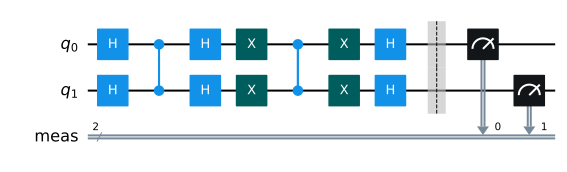

In [13]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

그래서 시뮬레이션할 때 $|11\rangle$을 측정할 확률이 100%임을 알 수 있습니다. 이것이 우리 오라클의 해답이었습니다!

In [14]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

<!-- ::: q-block.exercise -->

### 도전

이 회로의 오라클을 위에서 생성한 다른 오라클로 교체해 보십시오. 예상한 결과가 나오나요?

[IBM Quantum Lab](https://quantum-computing.ibm.com/lab)을 사용해 보십시오.

<!-- ::: -->

## SAT 문제들은 어렵습니다

![Graph of problem size vs algorithm running time. Both random guessing and Grover's algorithm are shown as exponential curves, with Grover growing slightly slower than random guessing.](images/grover/rg-vs-grover-sat.svg)

무작위 추측은 데이터베이스의 항목 수에 따라 선형적으로 증가합니다, 그리고 (우리가 훨씬 더 잘할 수 있다는 것을 알고 있지만) 이게 실제로 그렇게 나쁘지는 않습니다. 하지만 우리는 일반적으로 알고리즘이 *비트 단위* 의 입력 길이에 따라 어떻게 성장하는지 측정합니다, 즉 이 두 가지가 어떤 관계일까요? SAT 문제의 각 추가 변수(비트)는 가능한 해답(즉, 데이터베이스 항목)의 수를 *두 배로* 하므로 검색 공간은 비트 수에 따라 기하급수적으로 증가합니다.

$$\cssId{Big-N}{N} = 2^\cssId{lil-n}{n}$$

랜덤 추측은 $N$와 함께 선형적으로 증가하기 때문에 실행 시간은 대략 $2^n$만큼 증가합니다.

<!-- ::: q-block.exercise -->

### 막간 퀴즈

<!-- ::: q-quiz(goal="intro-grover-6") -->

<!-- ::: .question -->

Grover 알고리즘의 실행 시간은 입력 비트 수에 따라 (해가 하나뿐인 경우) 어떻게 증가합니까?

<!-- ::: -->

<!-- ::: .option -->

1. $\sqrt{n}$

<!-- ::: -->

<!-- ::: .option -->

1. $2^n$

<!-- ::: -->

<!-- ::: .option(correct) -->

1. $\sqrt{2^n}$

<!-- ::: -->

<!-- ::: .option -->

1. $\sqrt{2^{n/2}}$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## 구조의 활용

지금까지 우리는 SAT 문제를 완전히 구조화되지 않은 것처럼 취급했지만 정렬되지 않은 전화번호부와 달리 검색에 도움이 될 몇 가지 단서를 *가지고* 있습니다. SAT 문제는 블랙박스가 아니라 개별 절의 집합이며 이 절을 사용하여 정답을 찾을 수 있습니다. 이진 검색만큼 효율적인 것은 없지만 무작위 추측보다는 훨씬 낫습니다. SAT 문제의 구조를 사용하는 하나의 (고전적인) 알고리즘은 Schöning의 알고리즘입니다.

![Graph of problem size vs algorithm running time. Random guessing, Grover's algorithm and Schöning's algorithm are shown as exponential curves, with Schöning growing slightly slower than Grover, which in turn grows slower than random guessing](images/grover/rg-vs-grov-vs-schoning.svg)

무작위 추측과 마찬가지로 Schöning의 알고리즘은 무작위로 입력을 선택하고 작동하는지 확인합니다. 그러나 무작위 추측과 달리 이 문자열을 그냥 버리지 않습니다. 대신, 만족되지 않은 절을 선택하고 해당 절을 만족시키기 위해 문자열의 비트를 토글합니다. 성가시게도 이 새로운 문자열은 이전에 만족했던 다른 절을 만족시키지 못할 수 있지만 평균적으로 이러한 방식으로 비트를 몇 번 토글하는 것이 좋습니다. 초기 추측이 충분히 가까웠다면 올바른 솔루션을 발견할 가능성이 높습니다. 그렇지 않은 경우 몇 단계 후에 컴퓨터가 완전히 새로운 무작위 추측으로 다시 시작됩니다. 3-SAT의 경우((3보다 큰)-SAT에서는 안되지만) 이 알고리즘은 대략 $1.3334^n$로 성장합니다. 이는 무작위 추측을 능가할 뿐만 아니라 Grover 알고리즘을 능가합니다!

![Graph of problem size vs algorithm running time. The random guessing, Grover, Schöning, and ](images/grover/all-algos.svg)

언뜻 보기에는 명확하지 않을 수도 있지만 실제로 Grover과 Schöning의 알고리즘을 결합하여 개별적으로보다 더 나은 것을 얻을 수 있습니다. Schöning 알고리즘의 비트 토글 부분을 수행하는 회로를 생성하면 이를 신탁으로 사용하고 Grover 알고리즘을 사용하여 최상의 "초기 추측"을 찾을 수 있습니다. 이 과정에서 이것에 대해 다루지 않을 것이지만 이것을 조사를 하는 것은 재미있는 프로젝트가 될 것입니다!